In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [ ]:
target = df.pop('ring-number')
features = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(8124, 22)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(7,activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 22)                0         
                                                                 
 dense_65 (Dense)            (None, 400)               9200      
                                                                 
 dense_66 (Dense)            (None, 200)               80200     
                                                                 
 dense_67 (Dense)            (None, 100)               20100     
                                                                 
 dense_68 (Dense)            (None, 50)                5050      
                                                                 
 dense_69 (Dense)            (None, 7)                 357       
                                                                 
Total params: 114907 (448.86 KB)
Trainable params: 11

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
163/163 [==============================] - 2s 7ms/step - loss: 0.1503 - accuracy: 0.9665 - val_loss: 0.0138 - val_accuracy: 0.9931
Epoch 2/20
163/163 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 5.7708e-04 - val_accuracy: 1.0000
Epoch 3/20
163/163 [==============================] - 1s 5ms/step - loss: 1.8773e-04 - accuracy: 1.0000 - val_loss: 1.2003e-04 - val_accuracy: 1.0000
Epoch 4/20
163/163 [==============================] - 1s 5ms/step - loss: 5.2748e-05 - accuracy: 1.0000 - val_loss: 5.1466e-05 - val_accuracy: 1.0000
Epoch 5/20
163/163 [==============================] - 1s 7ms/step - loss: 2.6092e-05 - accuracy: 1.0000 - val_loss: 2.8737e-05 - val_accuracy: 1.0000
Epoch 6/20
163/163 [==============================] - 1s 8ms/step - loss: 1.6122e-05 - accuracy: 1.0000 - val_loss: 1.8905e-05 - val_accuracy: 1.0000
Epoch 7/20
163/163 [==============================] - 1s 8ms/step - loss: 1.0785e-05 - accuracy: 1.0000 - val_lo

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

51/51 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Accuracy: 1.0


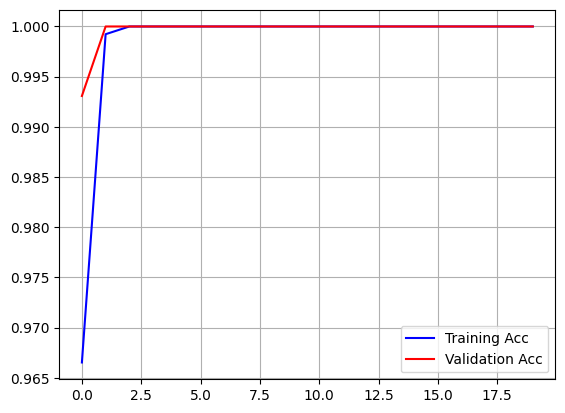

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
#print(f"precision: {precision}")
#print(f"recall: {recall}")